# Análise Descritiva de Mangas e Animes

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
sns.set_theme()

# Carregando Base de Dados

In [2]:
dataset_animes = pd.read_csv('/home/yurilima/Downloads/archive/MAL-anime.csv',
                            usecols=['Title', 
                                     'Rank', 
                                     'Type', 
                                     'Episodes', 
                                     'Aired', 
                                     'Members',
                                     'page_url', 
                                     'image_url', 
                                     'Score'])
dataset_mangas = pd.read_csv('/home/yurilima/Downloads/archive/MAL-manga.csv',
                            usecols=['Title', 
                                     'Rank', 
                                     'Type', 
                                     'Volumes', 
                                     'Published',
                                     'Members', 
                                     'page_url', 
                                     'image_url', 
                                     'Score'])

# Visualizando Base de Dados

## Animes

In [3]:
#Visualizando Base de Dados Animes
dataset_animes.head()

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44


## Mangás

In [4]:
#Visualizando Base de Dados Mangá
dataset_mangas.head()

,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,Rain,1808,Manga,?,Nov 2008 -,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90


# Informações Gerais Sobre os Datasets

Exibindo nomes, se há valores nulos e os tipos das colunas para inciar a exploração dos dados.

## Sobre o Dataset de Animes

In [5]:
dataset_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      12774 non-null  object 
 1   Rank       12774 non-null  int64  
 2   Type       12774 non-null  object 
 3   Episodes   12774 non-null  object 
 4   Aired      12774 non-null  object 
 5   Members    12774 non-null  int64  
 6   page_url   12774 non-null  object 
 7   image_url  12774 non-null  object 
 8   Score      12774 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 898.3+ KB


Não há valores nulos no dataset de animes disponibilizado pela Kaggle, contudo para o melhor entendimento da futura exploração e plotagem de gráficos, os nomes das colunas serão modificados para o português.

In [6]:
dataset_animes.columns = ['Titulo', 
                          'Posicao',
                          'Tipo', 
                          'Episodios', 
                          'Exibido',
                          'Espectadores', 
                          'url_pagina', 
                          'url_imagem',
                          'Avaliacao']
dataset_mangas.columns = ['Titulo',
                          'Posicao',
                          'Tipo',
                          'Volumes',
                          'Publicado em',
                          'Leitores',
                          'url_pagina',
                          'url_imagem',
                          'Avaliacao']

In [7]:
dataset_animes.head()

,Titulo,Posicao,Tipo,Episodios,Exibido,Espectadores,url_pagina,url_imagem,Avaliacao
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44


In [8]:
def mostrar_frequencias(dataset):
    tamanho = len(dataset)
    print('__________________________RELATÓRIO_GERAL__________________________')
    print(f'__________________________TAMANHO: {tamanho}__________________________')
    
    for coluna in dataset:
        nulos = dataset[coluna].isnull().sum()
        print('__________''FREQUÊNCIA RELATIVA_'+coluna+'___________')
        print(dataset[coluna].value_counts(normalize=True) * 100)
        print('O campo {} apresenta {:.2%} de valores nulos.'.format(coluna, (nulos/tamanho)))
mostrar_frequencias(dataset=dataset_animes)

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 12774__________________________
__________FREQUÊNCIA RELATIVA_Titulo___________
Net-juu no Susume                                        0.007828
Yurumates 3D Plus: Natsuyasumi Maison du Wish Report     0.007828
Tokkou                                                   0.007828
Asobi ni Iku yo!: Asobi ni Oide                          0.007828
Mujaki no Rakuen                                         0.007828
                                                           ...   
Ring of Gundam                                           0.007828
Grimms Notes The Animation                               0.007828
Mahoujin Guruguru (2017)                                 0.007828
Nanjamo no Aibou wa Nanimono nanja!? (Donna Monja TV)    0.007828
City Hunter: Goodbye My Sweetheart                       0.007828
Name: Titulo, Length: 12774, dtype: float64
O campo Titulo apresenta 0.00% de valores nulos

Ao analisar as frequencias relativas dos valores presentes nas colunas do dataset_animes, foi decidido manter todas os campos, iniciar quais perguntas podem ser feitar para explorar esse conjunto de dados. Contudo, a coluna ```Titulo | url_pagina |url_imagem ``` não participaram desse procedimento pois possuem valores únicos por todas a extensão da coluna. Não teria sentido prático no momento.

### Perguntas

- Quais os cinco animes mais bem posicionados?
- Quais os cinco animes com as piores posições?
- Dos animes que passavam na TV quais tinham mais episódio?
- Quantos animes tiveram 1 episódio? Eles eram todos filmes? Qual foi a melhor filme da base de dados?
- O que são OVAs e ONAs? Quais dessas duas categorias tiveram mais episódios?
- Qual OVA teve a melhor nota de rank?
- O número de pessoas envolvidas na produção do anime tem correlação com as sua qualidade em relação ao público?
- Qual o período que teve mais lançamento de animes dentro dessa base de dados?
- A qualidade dos animes, de acordo com essa base de dados, tem aumento ou diminuido?
- Quais desse animes aparecem na base de dados de mangá? 
- As notas dos mangás são parecidas com as dos seus respectivos animes?
- Se sim para ter uma referencia na base de dados de mangá, qual produção foi lançada primeiro?

# Tratando os Dados

Retirando da análise os animes que possuem o valor desconhecido. Encontramos apenas 1 e se o leitor tiver interesse no anime pode classificá-lo, contudo, creio que pela a imagem plotada de acordo com a URL pode ser uma versão japonesa do filme o Mágico de Oz.

In [9]:
tipo_desconhecido = dataset_animes[dataset_animes['Tipo'] == 'Unknown']
dataset_animes.drop(tipo_desconhecido.index, axis=0, inplace=True)

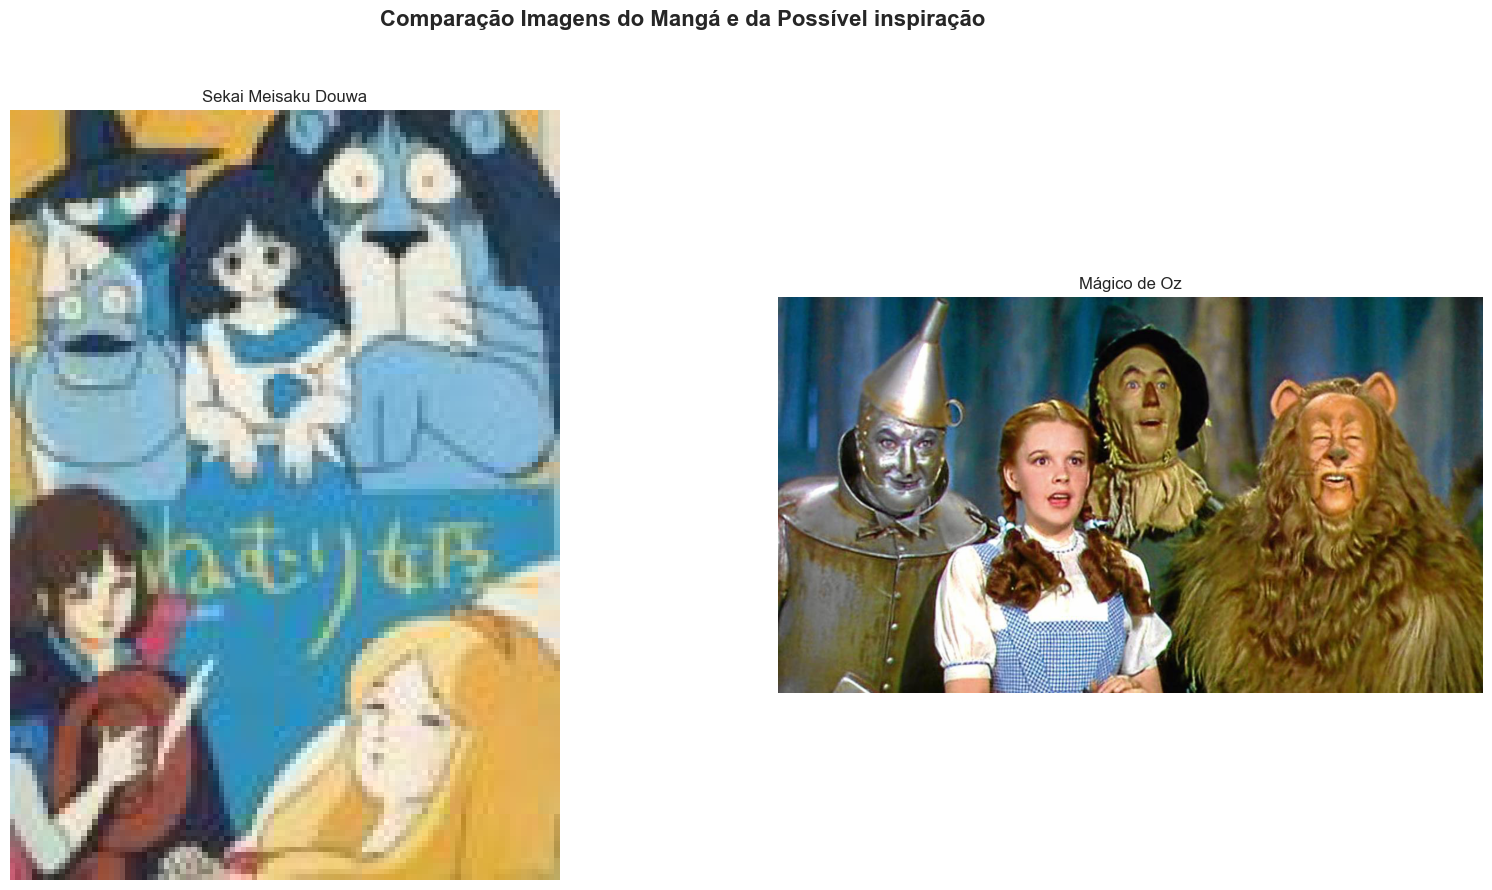

In [10]:
response = requests.get(tipo_desconhecido['url_imagem'].values[0])
magico_oz = requests.get('https://radiopeaobrasil.com.br/wp-content/uploads/2019/09/o_magico_de_oz.jpg')

img1 = Image.open(BytesIO(response.content)).convert("RGB")
img2 = Image.open(BytesIO(magico_oz.content)).convert("RGB")

fig, ax = plt.subplots(1,2, figsize=(20, 10));

ax[0].imshow(img1);
ax[0].set(title=tipo_desconhecido['Titulo'].values[0]);
ax[0].axis('off');
ax[1].imshow(img2);
ax[1].set(title='Mágico de Oz');
ax[1].axis('off');

plt.suptitle("Comparação Imagens do Mangá e da Possível inspiração", 
             fontsize=16, 
             fontweight='bold');

Outro tratamento a ser executado é o formato das datas. Encontrei um desafio para a melhor forma de formatar, mas por hora preferi não focar tanto no formato da data, mas sim em transformar no tipo de data para entender melhor o comportamento de exibição dos animes dentro dessa base de dados.

In [11]:
dataset_animes[['Data_Inicio', 'Data_Fim']] = dataset_animes['Exibido'].str.split(' - ', expand=True)

In [12]:
def mudar_para_data(x):
    if x == None:
        return x
    elif '-' in x:
        x = x.replace('-', '')
        return pd.to_datetime(x)
    else:
        return pd.to_datetime(x)
dataset_animes['Data_Inicio'] = dataset_animes['Data_Inicio'].apply(mudar_para_data)
dataset_animes['Data_Fim'] = dataset_animes['Data_Fim'].apply(mudar_para_data)

Feito a conversão da exibição criando duas colunas adicionais no formato de data, não faz sentido manter a coluna original, por isso a coluna ```Exibido``` foi desconsiderada.

In [13]:
dataset_animes.drop(columns='Exibido', inplace=True)

Outro tratamento feito para essa análise foi retirar da análise de dados os animes que não tem dados na coluna de ```Data_Inicio``` e ```Data_Fim```, mas para a curiosidade deste análise, esses animes selecionados foram registrados em variável para a consulta do mesmo e também de que se interessar. 

In [14]:
animes_sem_data = dataset_animes.query("Data_Inicio == 'NaT' & Data_Fim == 'NaT'")
dataset_animes.drop(animes_sem_data.index, inplace=True)

In [15]:
animes_sem_data

,Titulo,Posicao,Tipo,Episodios,Espectadores,url_pagina,url_imagem,Avaliacao,Data_Inicio,Data_Fim
142,Honoo no Alpenrose: Ai no Symphony Ongaku-hen,10208,OVA,1,514,https://myanimelist.net/anime/35628/Honoo_no_A...,https://cdn.myanimelist.net/r/100x140/images/a...,5.68,NaT,NaT
1698,Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu...,7883,OVA,1,591,https://myanimelist.net/anime/35129/Tottoko_Ha...,https://cdn.myanimelist.net/r/100x140/images/a...,6.20,NaT,NaT
2357,Katsudou Shashin,10962,Movie,1,7595,https://myanimelist.net/anime/33187/Katsudou_S...,https://cdn.myanimelist.net/r/100x140/images/a...,5.46,NaT,NaT
5413,Mahou no Princess Minky Momo: Yume wo Dakishim...,8804,Special,3,708,https://myanimelist.net/anime/30298/Mahou_no_P...,https://cdn.myanimelist.net/r/100x140/images/a...,6.01,NaT,NaT
6014,Hanako,9879,Movie,1,1503,https://myanimelist.net/anime/50740/Hanako,https://cdn.myanimelist.net/r/100x140/images/a...,5.76,NaT,NaT
6760,Burutabu-chan,11222,TV,?,276,https://myanimelist.net/anime/32237/Burutabu-chan,https://cdn.myanimelist.net/r/100x140/images/a...,5.37,NaT,NaT
8026,Saru Kani Gassen,12122,Movie,1,472,https://myanimelist.net/anime/30059/Saru_Kani_...,https://cdn.myanimelist.net/r/100x140/images/a...,4.93,NaT,NaT
10953,Captain Tsubasa no Shouka Sakusen,8261,OVA,1,756,https://myanimelist.net/anime/39226/Captain_Ts...,https://cdn.myanimelist.net/r/100x140/images/a...,6.13,NaT,NaT


Por fim, existe uma inconsistência nos dados referentes ao número de episódios. Foi encontrado o valor de "?" em vez de 1 ou qualquer outro valor. Então para otimizar a análise elas também vão ser removidas da análise, contudo vai ser armazenada em variável também. Um suspeita para esse tipo de registro aparecer é nenhum desses animes possui data de término, então pode ser que o total de episódios não tenha sido computado. 

In [16]:
animes_sem_numero_de_episodios = dataset_animes.query('Episodios == "?"')
dataset_animes.drop(animes_sem_numero_de_episodios.index, inplace=True)

In [17]:
animes_sem_numero_de_episodios.T

,1016,1532,1539,1589,1708,1714,1905,3340,3379,3493,...,10477,10668,11374,11497,11651,11708,11891,12022,12569,12726
Titulo,Puzzle & Dragon,Tom to Jerry (2022),Granblue Fantasy,Knyacki!,Hanakappa,Doraemon (2005),Bonobono (TV 2016),Wan Jie Xian Zong 5th Season,Pokemon (2023),Ninjala (TV),...,Okashi na Tensei,Ryoutei no Aji,Girigiri Warukunai Watame,Nintama Rantarou,Doraemon (2005) Specials,Yu☆Gi☆Oh! Go Rush!!,Shadowverse PVs,Touhou Niji Sousaku Doujin Anime: Musou Kakyou,Kirin the Noop,Sore Ike! Anpanman
Posicao,10009,7734,7308,8297,9383,1256,7240,4577,1730,11053,...,5175,5419,5376,3653,6145,10136,9780,2621,11830,6246
Tipo,TV,Special,ONA,TV,TV,TV,TV,ONA,TV,TV,...,TV,Special,ONA,TV,Special,TV,ONA,OVA,TV,TV
Episodios,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
Espectadores,1437,925,7235,1020,851,18608,2977,1876,20774,2398,...,26074,2219,876,7212,1186,5002,1159,38585,676,3574
url_pagina,https://myanimelist.net/anime/37096/Puzzle___D...,https://myanimelist.net/anime/53907/Tom_to_Jer...,https://myanimelist.net/anime/34454/Granblue_F...,https://myanimelist.net/anime/7505/Knyacki,https://myanimelist.net/anime/8336/Hanakappa,https://myanimelist.net/anime/8687/Doraemon_2005,https://myanimelist.net/anime/32353/Bonobono_T...,https://myanimelist.net/anime/49305/Wan_Jie_Xi...,https://myanimelist.net/anime/53876/Pokemon_2023,https://myanimelist.net/anime/50418/Ninjala_TV,...,https://myanimelist.net/anime/52611/Okashi_na_...,https://myanimelist.net/anime/30088/Ryoutei_no...,https://myanimelist.net/anime/51768/Girigiri_W...,https://myanimelist.net/anime/1199/Nintama_Ran...,https://myanimelist.net/anime/35686/Doraemon_2...,https://myanimelist.net/anime/50607/Yu☆Gi☆Oh_G...,https://myanimelist.net/anime/36639/Shadowvers...,https://myanimelist.net/anime/9874/Touhou_Niji...,https://myanimelist.net/anime/35694/Kirin_the_...,https://myanimelist.net/anime/1960/Sore_Ike_An...
url_imagem,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...,https://cdn.myanimelist.net/r/100x140/images/a...
Avaliacao,5.73,6.24,6.32,6.12,5.89,7.65,6.33,6.87,7.5,5.43,...,6.74,6.69,6.7,7.08,6.54,5.69,5.79,7.28,5.11,6.53
Data_Inicio,2018-04-01 00:00:00,2022-11-01 00:00:00,2013-11-01 00:00:00,1995-04-01 00:00:00,2010-03-01 00:00:00,2005-04-01 00:00:00,2016-04-01 00:00:00,2021-06-01 00:00:00,2023-04-01 00:00:00,2022-01-01 00:00:00,...,2023-07-01 00:00:00,2014-03-01 00:00:00,2022-01-01 00:00:00,1993-04-01 00:00:00,2005-04-01 00:00:00,2022-04-01 00:00:00,2015-10-01 00:00:00,2008-12-01 00:00:00,2014-02-01 00:00:00,1988-10-01 00:00:00
Data_Fim,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


O dataset de animes está pronto para a análise exploratória.

In [18]:
dataset_animes.head()

,Titulo,Posicao,Tipo,Episodios,Espectadores,url_pagina,url_imagem,Avaliacao,Data_Inicio,Data_Fim
0,Net-juu no Susume,1568,TV,10,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55,2017-10-01,2017-12-01
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55,1997-07-01,1997-07-01
2,Templex,11445,Movie,1,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29,2015-01-01,2015-01-01
3,s.CRY.ed,2248,TV,26,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36,2001-07-01,2001-12-01
4,Toaru Majutsu no Index-tan III,6679,Special,2,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44,2018-12-01,2019-04-01


# Respondendo as Perguntas Estipuladas

Quais os cinco animes mais bem posicionados?

+++++++++++++Posiçao++++++++++++++++
1° Lugar:  Fullmetal Alchemist: Brotherhood
2° Lugar:  Steins;Gate
3° Lugar:  Bleach: Sennen Kessen-hen
4° Lugar:  Gintama°
5° Lugar:  Kaguya-sama wa Kokurasetai: Ultra Romantic


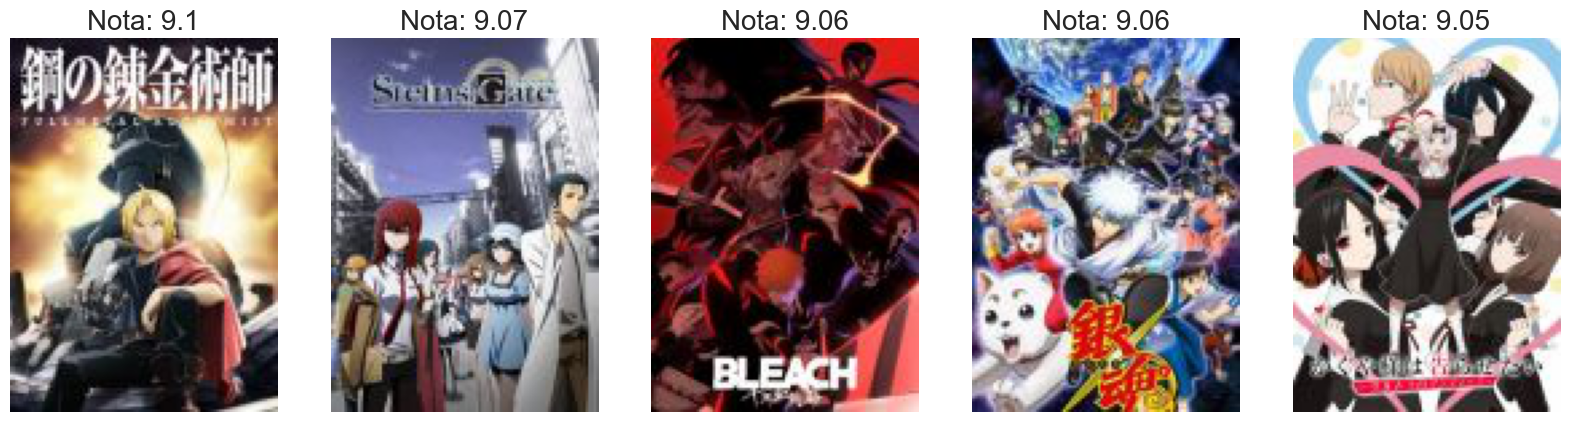

In [19]:
melhores_animes = dataset_animes[['Titulo', 'Posicao', 'Avaliacao', 'url_imagem']].sort_values(by='Posicao')

urls = list(melhores_animes['url_imagem'])[0:5]
titulos = list(melhores_animes['Titulo'])[0:5]
valores = list(melhores_animes['Avaliacao'])[0:5]

fig, axs = plt.subplots(1, 
                        len(urls), 
                        figsize=(20, 10))

for i, url in enumerate(urls):
    response = requests.get(url)
    try:
        img = Image.open(BytesIO(response.content))
        img = img.convert("RGB")
        axs[i].imshow(img)  # Usar axs[i] para exibir a imagem no eixo correto
        axs[i].set_title(f"Nota: {valores[i]}", fontsize=20)  # Usar axs[i] para definir o título no eixo correto
        axs[i].axis('off')
    except Exception as e:
        print(f"Erro ao abrir a imagem da URL {url}: {e}")
print("+++++++++++++Posiçao++++++++++++++++")
for i,titulo in enumerate(titulos):
    print(f'{i+1}° Lugar: ',titulo)
plt.show()

Quais os cinco animes com as piores posições?

+++++++++++++Posiçao++++++++++++++++
1° Lugar:  Tenkuu Danzai Skelter+Heaven
2° Lugar:  Utsu Musume Sayuri
3° Lugar:  Hametsu no Mars
4° Lugar:  Kokuhaku
5° Lugar:  Aki no Puzzle


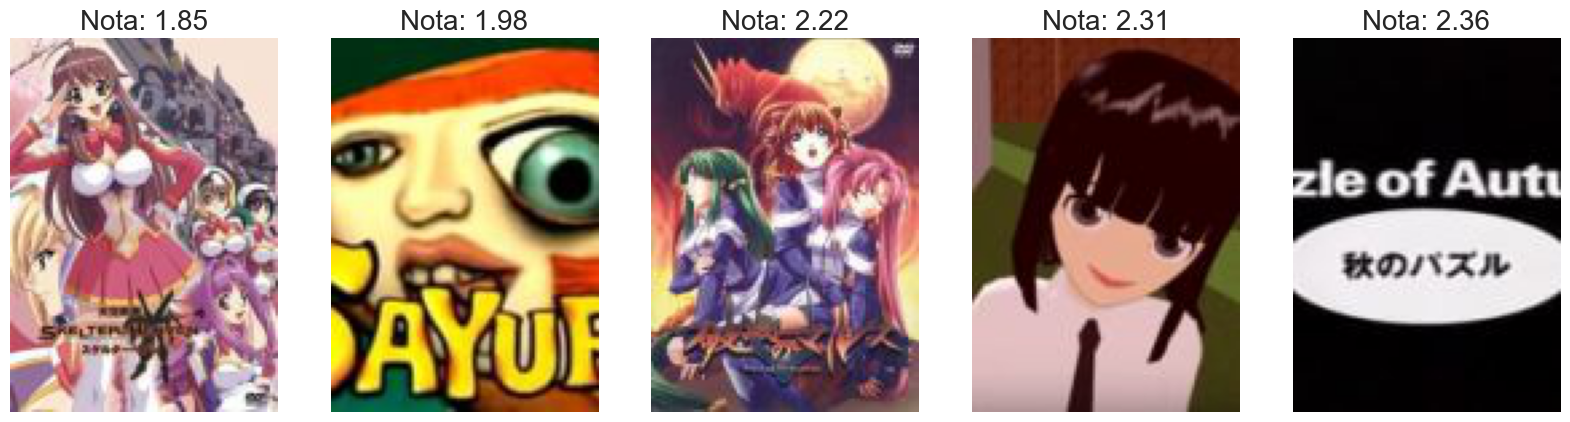

In [20]:
piores_animes = dataset_animes[['Titulo', 'Posicao', 'Avaliacao', 'url_imagem']].sort_values(by='Posicao')

urls = list(melhores_animes['url_imagem'])[-5:][::-1]
titulos = list(melhores_animes['Titulo'])[-5:][::-1]
valores = list(melhores_animes['Avaliacao'])[-5:][::-1]

fig, axs = plt.subplots(1, 
                        len(urls), 
                        figsize=(20, 10))

for i, url in enumerate(urls):
    response = requests.get(url)
    try:
        img = Image.open(BytesIO(response.content))
        img = img.convert("RGB")
        axs[i].imshow(img)  # Usar axs[i] para exibir a imagem no eixo correto
        axs[i].set_title(f"Nota: {valores[i]}", fontsize=20)  # Usar axs[i] para definir o título no eixo correto
        axs[i].axis('off')
    except Exception as e:
        print(f"Erro ao abrir a imagem da URL {url}: {e}")
print("+++++++++++++Posiçao++++++++++++++++")
for i,titulo in enumerate(titulos):
    print(f'{i+1}° Lugar: ',titulo)
plt.show()

Dos animes que passavam na TV quais tinham mais episódio?

In [21]:
anime_com_mais_episodios = dataset_animes[['Titulo', 'Episodios']].max()
anime_com_mais_episodios.to_frame().T

,Titulo,Episodios
0,◯,99


In [22]:
mais_episodios = dataset_animes[dataset_animes['Titulo'] == '◯']['url_imagem'].values[0]

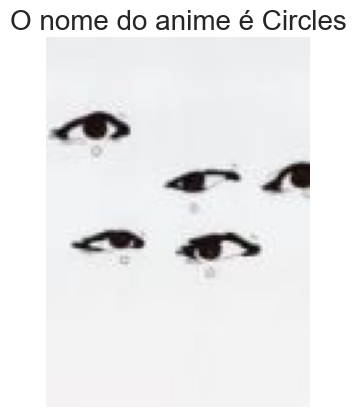

In [23]:
response = requests.get(mais_episodios)

img1 = Image.open(BytesIO(response.content)).convert("RGB")
plt.title('O nome do anime é Circles', fontsize=20)
plt.imshow(img1);
plt.axis('off');

Quantos animes tiveram 1 episódio? Eles eram todos filmes? Qual foi a melhor filme da base de dados?

In [24]:
animes_com_1_ep = dataset_animes.groupby('Episodios').get_group('1')

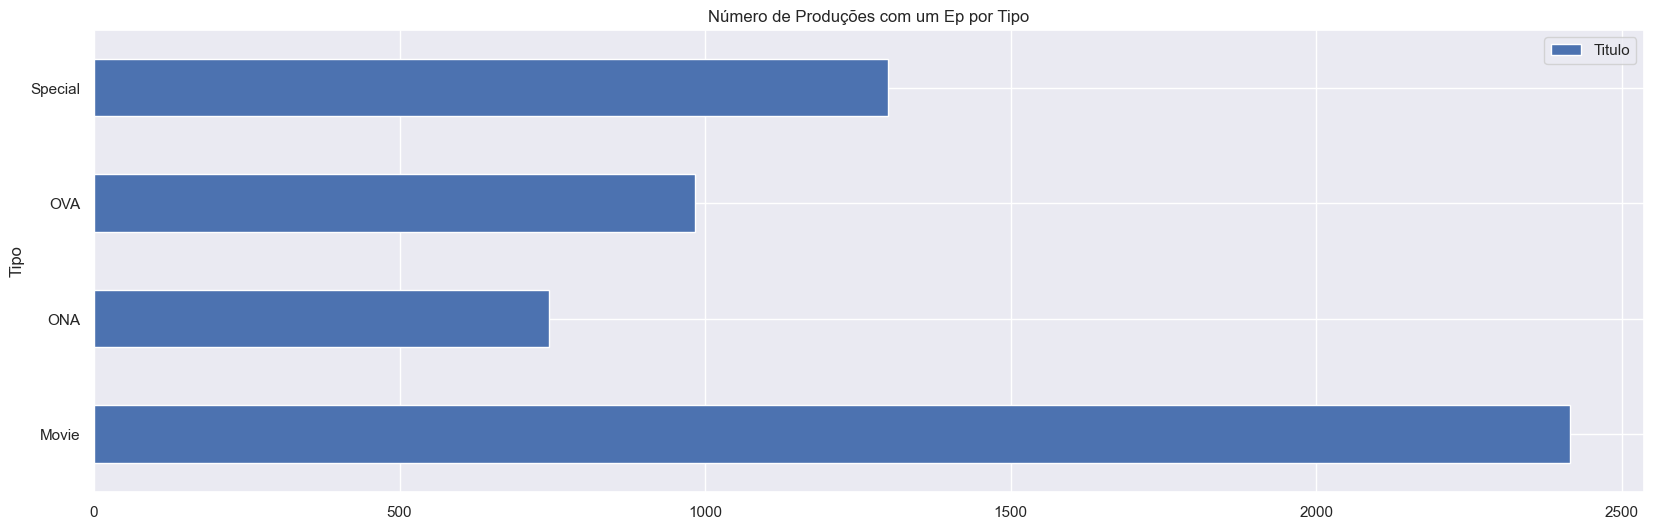

In [25]:
animes_com_1_ep.groupby('Tipo')[['Titulo']].count().plot(kind='barh', 
                                                         title='Número de Produções com um Ep por Tipo',
                                                        figsize=(20,6));

In [26]:
animes_com_1_ep[['Titulo', 'Avaliacao']].max().to_frame().T

,Titulo,Avaliacao
0,◯,9.04


O que são OVAs e ONAs? Quais dessas duas categorias tiveram mais episódios?

# OVA (Original Video Animation)
"É um formato de animação que consiste de um ou mais episódios de anime lançados diretamente ao mercado de vídeo, sem prévia exibição na televisão ou nos cinemas."
# ONA (Original Net Animation)
"Trata-se de animes produzidos exclusivamente para a internet. Embora não seja muito popular no Japão, vem ganhando destaque no mundo todo nos últimos anos."

In [27]:
onas_ovas = dataset_animes.query('Tipo == "ONA" | Tipo == "OVA"')
onas_ovas.groupby('Tipo')[['Titulo', 'Tipo', 'Episodios']].max()

,Titulo,Tipo,Episodios
Tipo,,,
ONA,◯,ONA,95
OVA,xxxHOLiC Shunmuki,OVA,9


Qual OVA teve a melhor nota de rank?

In [28]:
onas_ovas[['Titulo', 'Tipo', 'Avaliacao']].groupby('Tipo').max()

,Titulo,Avaliacao
Tipo,,
ONA,◯,8.72
OVA,xxxHOLiC Shunmuki,9.02


O número de espectadores do anime tem correlação com as sua qualidade em relação ao público?

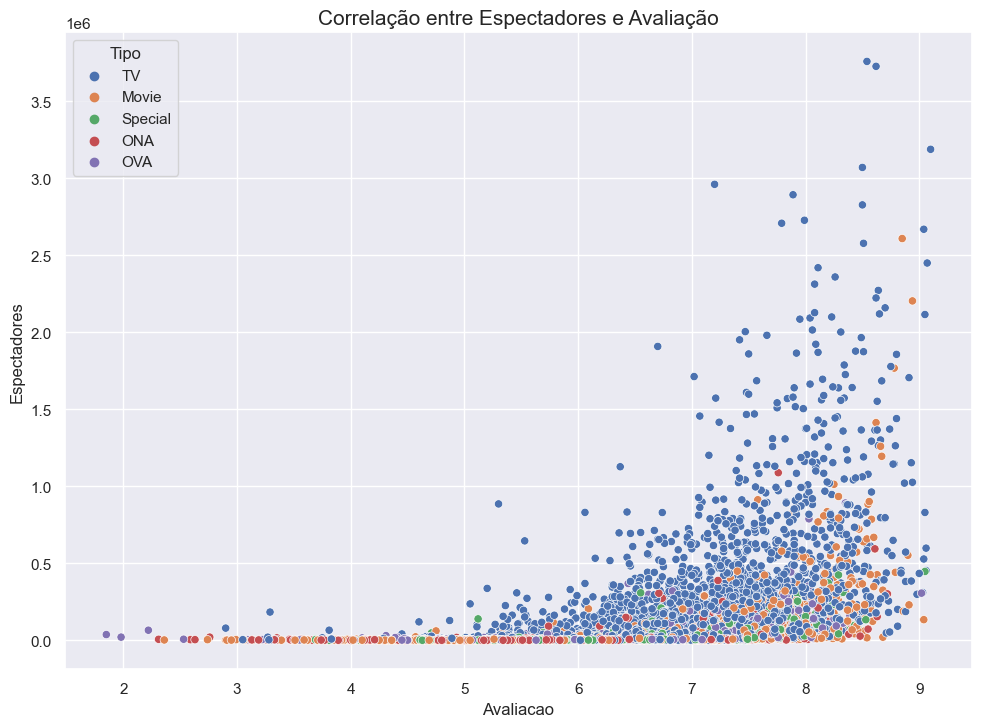

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=dataset_animes['Avaliacao'],
                y=dataset_animes['Espectadores'],
               hue=dataset_animes['Tipo'], );
plt.title('Correlação entre Espectadores e Avaliação', fontsize=15);

Para confirmar a correlção entre as duas variáveis

In [42]:
coeficiente_correlacao = dataset_animes['Espectadores'].corr(dataset_animes['Avaliacao'])
if coeficiente_correlacao < 0.90:
    print(f'{coeficiente_correlacao:.2f} é uma correlação fraca.')
else:
    print(f'{coeficiente_correlacao:.2f} é uma boa correlação.')

0.40 é uma correlação fraca.


Qual o período que teve mais lançamento de animes dentro dessa base de dados?

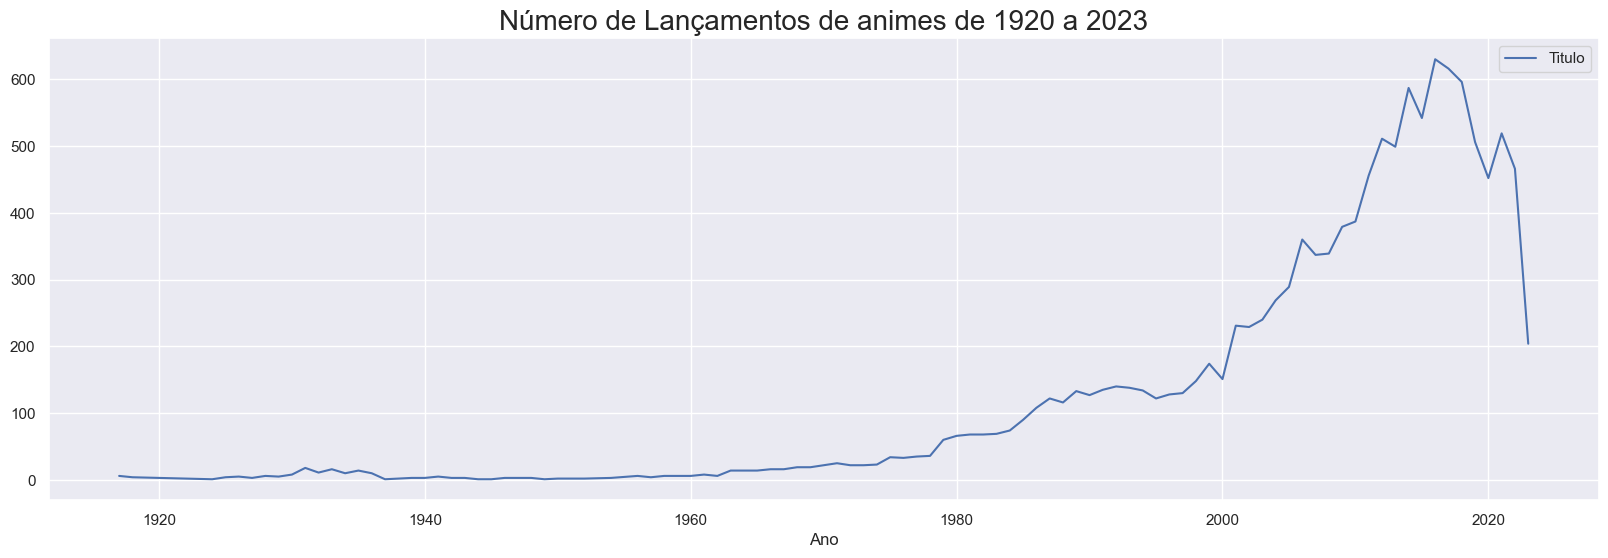

In [30]:
dataset_animes['Ano'] = dataset_animes['Data_Inicio'].dt.year
data_lancamento = dataset_animes.groupby('Ano')[['Titulo']].count()
data_lancamento.plot(figsize=(20,6));
plt.title('Número de Lançamentos de animes de 1920 a 2023', fontsize=20);

A qualidade dos animes, de acordo com essa base de dados, tem aumento ou diminuido em relação ao ano passado (2022)?

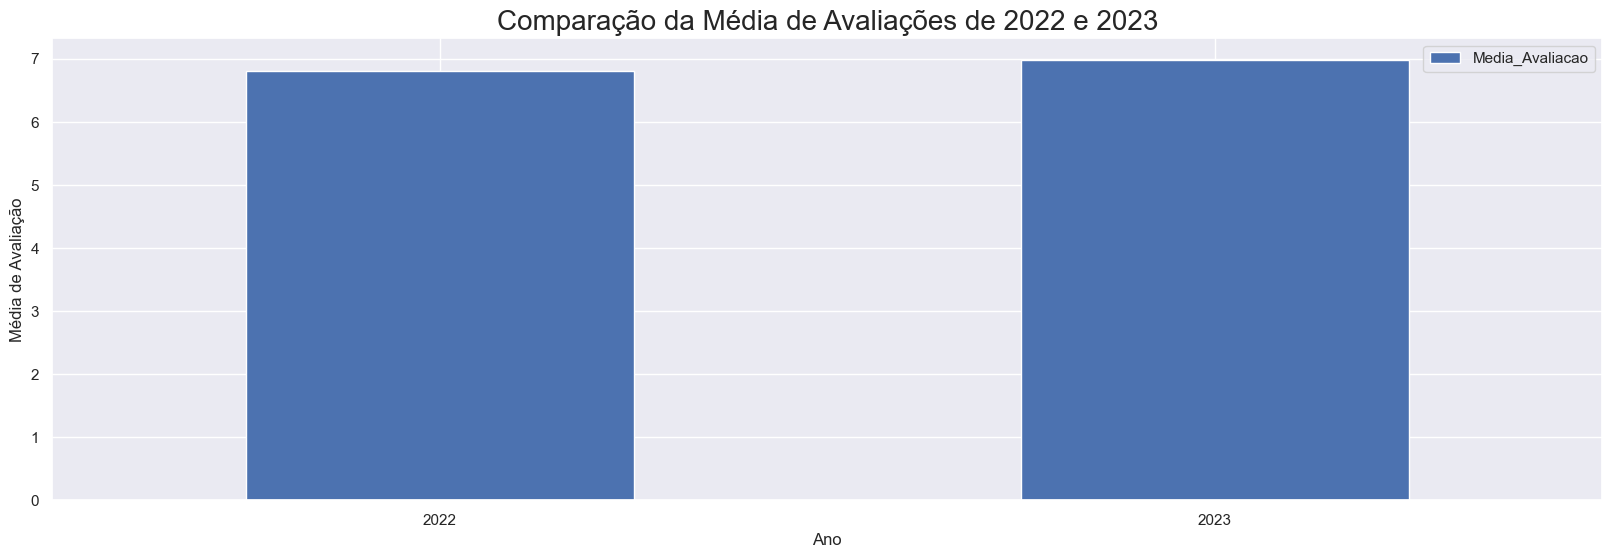

In [31]:
medias_por_ano = dataset_animes.query('Ano == 2022 or Ano == 2023').groupby('Ano')['Avaliacao'].mean()

df_medias = pd.DataFrame({'Ano': medias_por_ano.index, 'Media_Avaliacao': medias_por_ano.values})

df_medias.plot(x='Ano', y='Media_Avaliacao', 
               kind='bar', 
               figsize=(20, 6), 
               rot=0, 
               xlabel='Ano', 
               ylabel='Média de Avaliação')
plt.title('Comparação da Média de Avaliações de 2022 e 2023', fontsize=20)
plt.show()

Quais desse animes aparecem na base de dados de mangá?

In [32]:
titulos_animes = list(dataset_animes['Titulo'].values)
titulos_mangas = []
for i, titulo in enumerate(dataset_mangas['Titulo']):
    if titulo in titulos_animes:
        titulos_mangas.append(i)
print(f'Existem {len(titulos_mangas)} títulos de mangás com o mesmo nome do anime.')

Existem 2077 títulos de mangás com o mesmo nome do anime.


As notas dos mangás são parecidas com as dos seus respectivos animes?

In [33]:
mangas_animes = dataset_mangas.iloc[titulos_mangas,:]
mangas_animes[mangas_animes['Titulo'].isin(melhores_animes[:5]['Titulo'].values)]

,Titulo,Posicao,Tipo,Volumes,Publicado em,Leitores,url_pagina,url_imagem,Avaliacao
7583,Steins;Gate,650,Manga,3,Sep 2009 - Jul 2013,25005,https://myanimelist.net/manga/17517/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/m...,8.05
9020,Steins;Gate,132,Light-Novel,5,Jun 2011 - May 2012,12088,https://myanimelist.net/manga/39859/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/m...,8.51


# Conclusão

Com base na análise realizada dos dados de animes e mangás, podemos chegar a algumas conclusões interessantes.
Primeiramente, foi uma experiência enriquecedora explorar dados relacionados a um tema que tenho grande afinidade, como animes e mangás. Isso mostrou o quanto a exploração de dados pode ser divertida e revelar insights valiosos sobre um assunto que nos interessa.

Observamos que os cinco animes mais bem avaliados são produções de alta qualidade, o que não é surpreendente, pois animes populares tendem a receber mais atenção e reconhecimento do público.

Por outro lado, os cinco animes com as piores posições nos deixam intrigados, e a arte dessas produções pode ser motivo de surpresa e até mesmo perplexidade. Isso mostra que nem todas as produções podem atender às expectativas do público.

Também identificamos que os OVAs (Original Video Animations) são mais frequentes e têm mais episódios do que os ONAs (Original Net Animations), indicando que OVAs são mais comuns em comparação com ONAs.

Quanto ao período com maior lançamento de animes, notamos um aumento significativo em 2019, seguido por uma leve queda em 2020 até o período de 2023. Isso pode ser influenciado pela pandemia do COVID-19, que afetou diversas indústrias, incluindo a indústria de animes.

Ao investigar a correlação entre o número de espectadores e a qualidade do anime, descobrimos que a correlação é baixa (0,40), sugerindo que não há uma relação direta entre o número de espectadores e a qualidade do anime. Isso pode ser explicado pelo fato de que o sucesso de um anime não está diretamente ligado ao número de membros da equipe de produção, mas sim ao apoio e à reação do público em geral.

Em suma, essa análise dos dados de animes e mangás nos permitiu obter insights valiosos sobre esse universo, e percebemos que a exploração de dados pode ser aplicada a qualquer tema com resultados interessantes. A combinação de nossa paixão e habilidades profissionais pode nos levar a oportunidades incríveis, como essa experiência com análise de dados de animes, que nos proporcionou uma visão ainda mais profunda e gratificante do universo otaku.